# Brownian Motion via Random Walks

January 2019 @Quant_Girl

The idea of this post is to show how Donsker's Theorem (also known as Donsker's invariance principle, or the functional central limit theorem) allows us to simulate paths of the one-dimensional standard Brownian motion using different kinds of random walks.


In [1]:
import sys
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
from PIL import Image
from IPython.display import HTML
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 7]
np.random.seed(123)

## Simple Random Walk

First, we simulate a simple random walk.

In [3]:
def simple_walk(x0=0, n=30, step=1, p=0.5, vis=True):
    
    '''
    Returns a list with the values of a simple Random Walk defined by
    the following parameters.
    
    x0 : starting point
    n : lenght of the walk
    step : size of the steps
    p : probability of going up
    vis : to display de plot True
    
    '''
    
    values = [x0] + [step if random.random()>p else -step for i in range(1,n)]
    walk = np.cumsum(values)

    if vis == True:       
        plt.plot(walk,  linestyle='--', marker='o', color="purple")
        plt.axhline(lw=0.5, color='black')
        plt.ylabel('$S_k$', fontsize=14)
        plt.xlabel('k', fontsize=14)
        plt.title('Simple Random Walk n='+ str(n), fontsize=16)
        plt.show()
        
    return walk

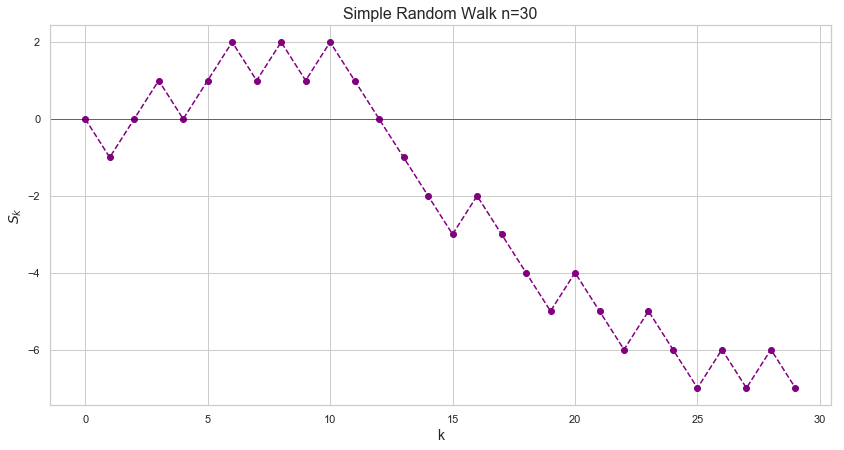

In [4]:
simple = simple_walk()

Now, we scale the vertical axis.

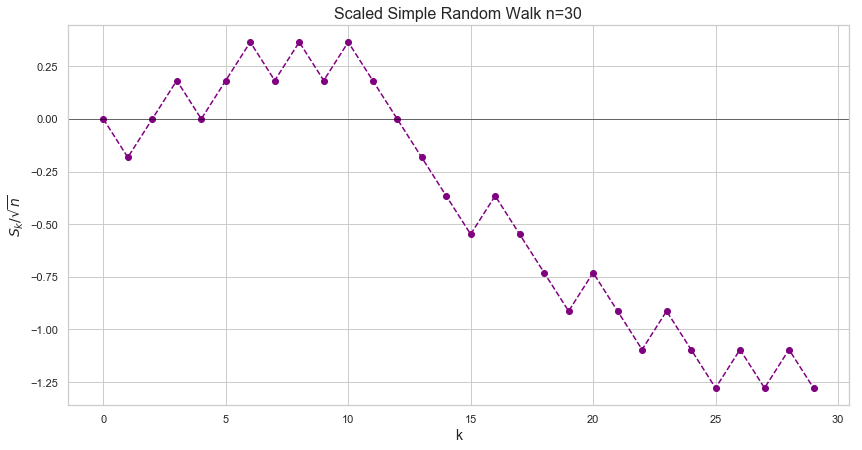

In [5]:
n =len(simple)
scaled = [0] + [simple[k]/math.sqrt(n) for k in range(1,n)]
xscaled = range(0,n)

plt.plot(xscaled, scaled,  linestyle='--', marker='o', color="purple")
plt.axhline(lw= 0.5, color='black')
plt.ylabel('${S}_k/\sqrt{n} $', fontsize=14)
plt.xlabel('k', fontsize=14)
plt.title('Scaled Simple Random Walk n=' + str(n), fontsize=16)
plt.show()


Finally, we scale the horizontal axis to fit our walk into the interval $[0,1]$.

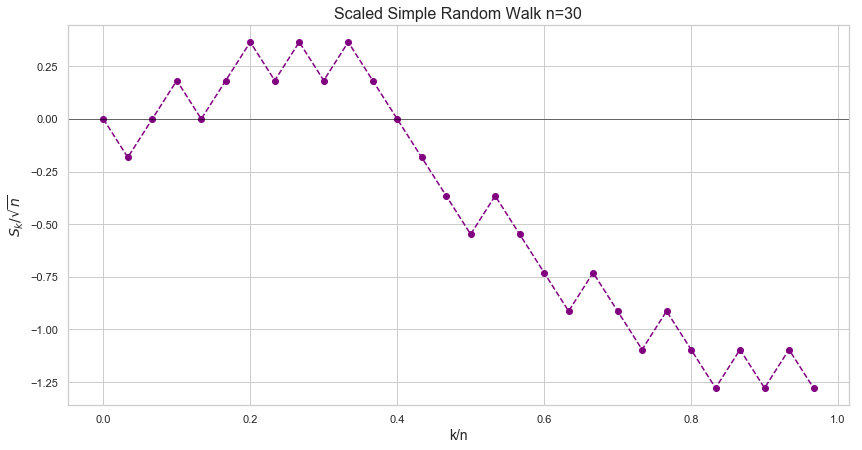

In [6]:
n= len(simple)
scaled = [0] + [simple[k]/math.sqrt(n) for k in range(1,n)]
xscaled = [k/n for k in range(0,n)]

plt.plot(xscaled, scaled,  linestyle='--', marker='o', color="purple")
plt.axhline(lw= 0.5, color='black')
plt.ylabel('${S}_k/\sqrt{n} $', fontsize=14)
plt.xlabel('k/n', fontsize=14)
plt.title('Scaled Simple Random Walk n='+str(n), fontsize=16)
plt.show()


The above plot may not look like a Brownian motion trajectory since we used a small $n$.
So, let's visualise a walk of lenght $n=1000$.

In [7]:
def scaled_walk(walk, vis=True):
    
    '''
    Returns a data frame with the scaled walk
    walk : original random walk -- which is going to be scaled as in Donsker's Theorem -- 
    vis : to display the plot of the scaled walk
    
    '''
    
    n = len(walk)
    scaled = [0] + [ (walk[k]/math.sqrt(n)) for k in range(1,n)]
    xscaled = [k/n for k in range(0,n)]
    
    if vis==True:
        plt.plot(xscaled, scaled,  linestyle='--', marker='o', color="purple")
        plt.axhline(lw=0.5, color='black')
        plt.ylabel('$W^n(t)$', fontsize=14)
        plt.xlabel('t', fontsize=14)
        plt.title('Brownian Motion approximated by Random Walk n='+ str(n), fontsize=16)
        plt.show()
    
    frame = pd.DataFrame( {'xscaled':xscaled, 'scaled':scaled} )

    return frame 

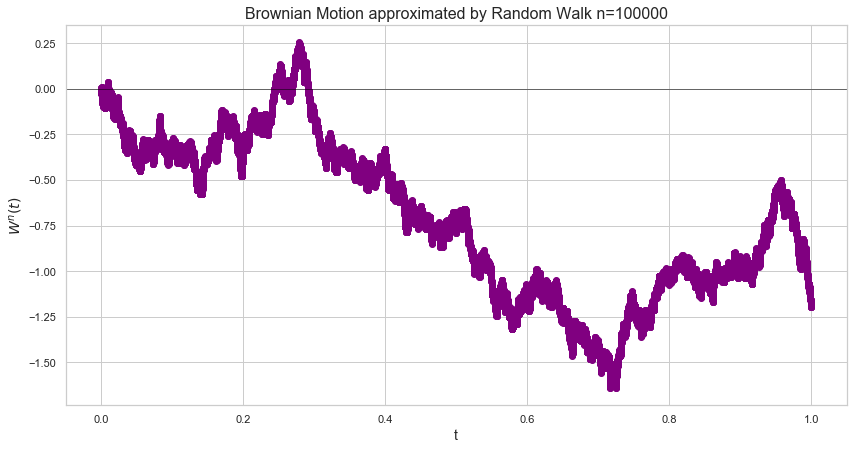

In [16]:
long_walk = scaled_walk(simple_walk(n=100000, vis=False), vis=True)

## Normal Random Walk

In [9]:
def normal_walk(x0=0, n=30, mu=0, sigma=1, vis=True):
    
    '''
    Returns a list with the values of a Normal Random Walk defined by
    the following parameters.
    
    x0 : starting point
    n : lenght of the walk
    mu, sigma : meand and stdv of the normal distribution
    vis : to display de plot True
    
    '''
    
    values = [x0] + [((random.gauss(mu,sigma)-mu)/sigma) for i in range(1,n)]
    walk = np.cumsum(values)        
    
    if vis==True:
        plt.plot(walk,  linestyle='--', marker='o', color="purple")
        plt.axhline(lw=0.5, color='black')
        plt.ylabel('$S_k$', fontsize=14)
        plt.xlabel('k', fontsize=14)
        plt.title('Normal Random Walk'+ ' n= ' + str(n), fontsize=16)         
        plt.show()
    
    return walk

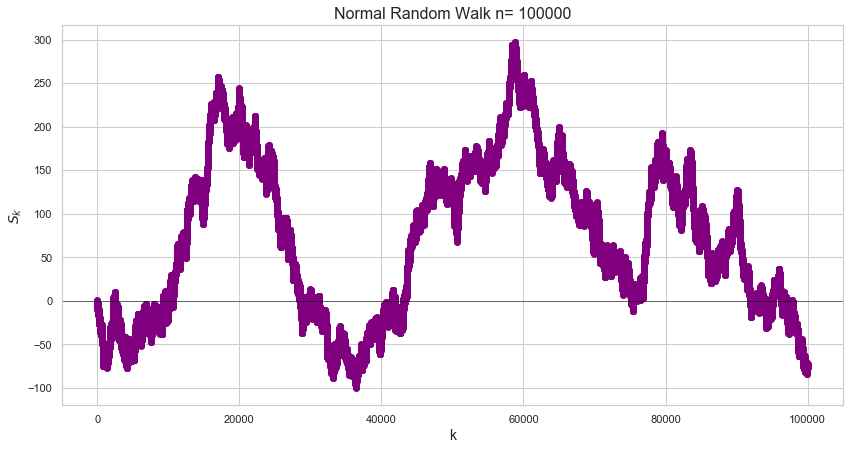

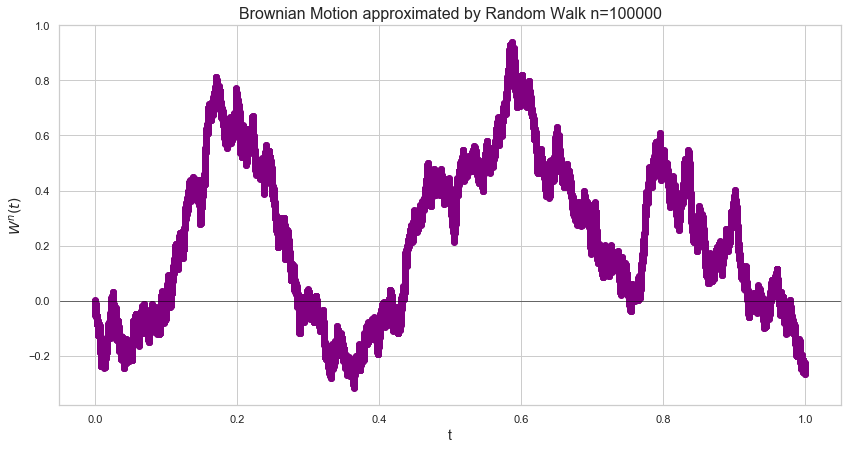

In [15]:
normal_w = normal_walk(n=100000)
normal_scaled = scaled_walk(normal_w)

## Exponential Random Walk

In [11]:
def exp_walk(x0=0, n=30, par=1, vis=True):
    
    '''
    Returns a list with the values of an Exponential Random Walk defined by
    the following parameters.
    
    x0 : starting point
    n : lenght of the walk
    par : lambda parameter of the Exponential distribution
    vis : to display de plot True
    
    '''
    
    
    values = [x0] + [(par*random.expovariate(par)-1) for i in range(1,n)]
    walk = np.cumsum(values)      
    
    if vis==True:
        plt.plot(walk,  linestyle='--', marker='o', color="purple")
        plt.axhline(lw=0.5, color='black')
        plt.ylabel('$S_k$', fontsize=14)
        plt.xlabel('k', fontsize=14)
        plt.title('Exponential Random Walk'+ ' n=' + str(n), fontsize=16)     
        plt.show()
    
    return walk

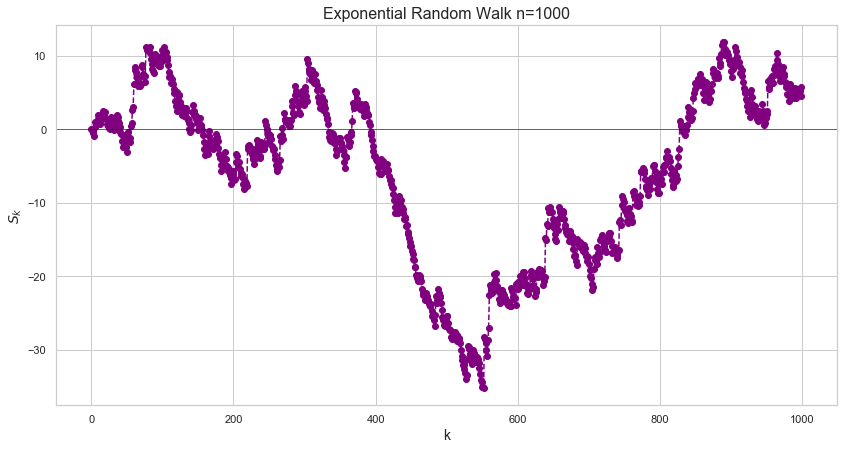

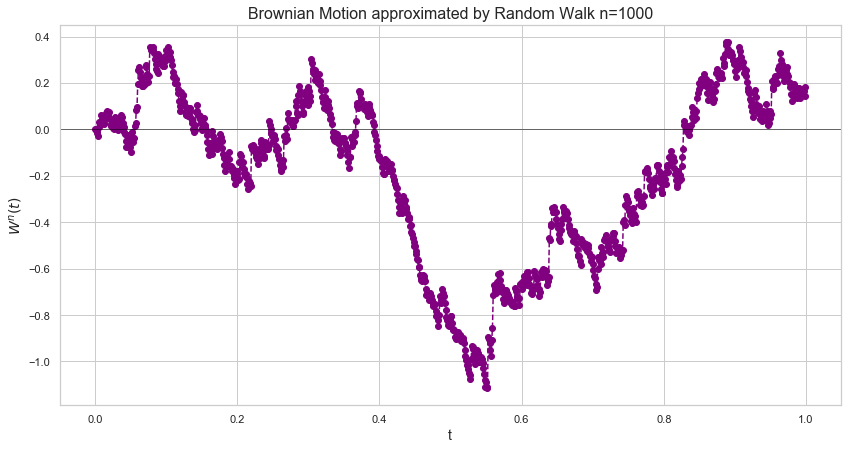

In [17]:
exponential_w = exp_walk(n=1000)
exp_scaled = scaled_walk(exponential_w)